In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import norm
import pprint as pp
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
portfolio1 = pd.read_csv('Portfolio 1.csv')
portfolio2 = pd.read_csv('Portfolio 2.csv')
portfolio3 = pd.read_csv('Portfolio 3.csv')

#sort portfolio by asset
portfolio1 = portfolio1.sort_values(by=['Asset'])
portfolio2 = portfolio2.sort_values(by=['Asset'])
portfolio3 = portfolio3.sort_values(by=['Asset'])


In [3]:
START_DATE = '2017-01-01'
END_DATE = '2022-01-01'

START_DATE = '2022-04-01'
END_DATE = '2022-10-01'

N_DAYS=252
N_SIMULATION = 10**5

TICKERS1 =  portfolio1['Asset'].tolist()
TICKERS2 =  portfolio2['Asset'].tolist()
TICKERS3 =  portfolio3['Asset'].tolist()

WEIGHT1 = portfolio1['Weight'].tolist()
WEIGHT2 = portfolio2['Weight'].tolist()
WEIGHT3 = portfolio3['Weight'].tolist()

N_ASSETS1 = len(TICKERS1)
N_ASSETS2 = len(TICKERS2)
N_ASSETS3 = len(TICKERS3)

prices1_df = yf.download(TICKERS1, start=START_DATE, 
                        end=END_DATE, adjusted=True)

prices2_df = yf.download(TICKERS2, start=START_DATE,
                        end=END_DATE, adjusted=True)

prices3_df = yf.download(TICKERS3, start=START_DATE,
                        end=END_DATE, adjusted=True)
                        
adj_close1_df = prices1_df['Adj Close']
adj_close2_df = prices2_df['Adj Close']
adj_close3_df = prices3_df['Adj Close']

pct_returns1_df = adj_close1_df.pct_change().dropna()
pct_returns2_df = adj_close2_df.pct_change().dropna()
pct_returns3_df = adj_close3_df.pct_change().dropna()

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed


In [4]:
# apply the weights to returns
wt_portfolio_ret1 = pct_returns1_df * WEIGHT1
wt_portfolio_ret2 = pct_returns2_df * WEIGHT2
wt_portfolio_ret3 = pct_returns3_df * WEIGHT3

# calculate the portfolio returns
portfolio_returns1 = wt_portfolio_ret1.sum(axis = 1)
portfolio_returns2 = wt_portfolio_ret2.sum(axis = 1)
portfolio_returns3 = wt_portfolio_ret3.sum(axis = 1)

cum_ret_port1 = (portfolio_returns1 + 1).cumprod() - 1
cum_ret_port2 = (portfolio_returns2 + 1).cumprod() - 1
cum_ret_port3 = (portfolio_returns3 + 1).cumprod() - 1

total_return1 = cum_ret_port1.tail(1)
total_return2 = cum_ret_port2.tail(1)
total_return3 = cum_ret_port3.tail(1)

# date actually started on '2022-04-04' instead of '2022-04-01', thus minus 3 days from the 5 years period
annualized_ret_portfolio1 = ((1+total_return1)**(1/((365*5-3)/365)))-1
annualized_ret_portfolio2 = ((1+total_return2)**(1/((365*5-3)/365)))-1
annualized_ret_portfolio3 = ((1+total_return3)**(1/((365*5-3)/365)))-1

print('Portfolio 1 Annualized Return: ', annualized_ret_portfolio1[0])
print('Portfolio 2 Annualized Return: ', annualized_ret_portfolio2[0])
print('Portfolio 3 Annualized Return: ', annualized_ret_portfolio3[0])

Portfolio 1 Annualized Return:  -0.040951092368405884
Portfolio 2 Annualized Return:  -0.030496174070662185
Portfolio 3 Annualized Return:  -0.04098196247691577


[*********************100%***********************]  1 of 1 completed


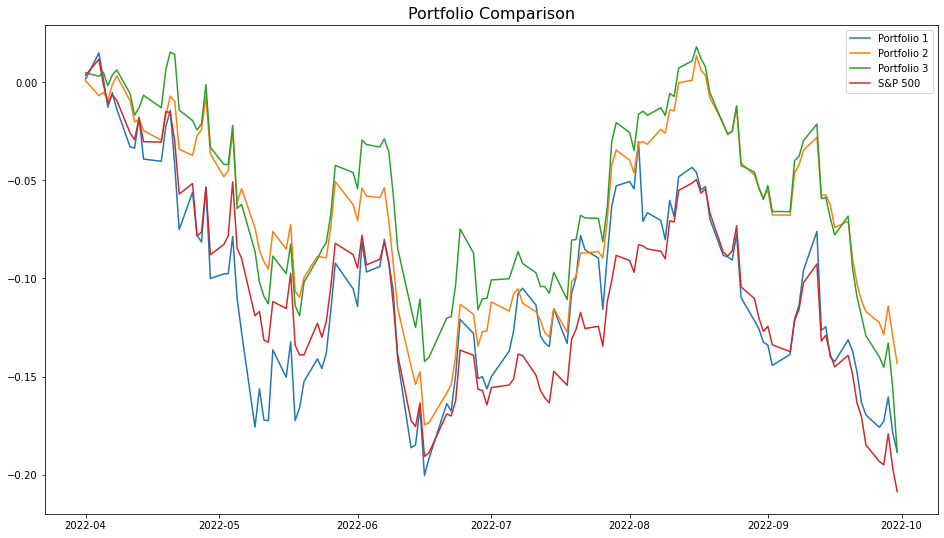

In [5]:
fig, ax = plt.subplots(figsize=(16,9))
#add title
ax.set_title('Portfolio Comparison', fontsize=16)
ax.plot(cum_ret_port1, label='Portfolio 1')
ax.plot(cum_ret_port2, label='Portfolio 2')
ax.plot(cum_ret_port3, label='Portfolio 3')
#plot snp500
snp500 = yf.download('^GSPC', start=START_DATE, end=END_DATE, adjusted=True)
snp500 = snp500['Adj Close']
snp500 = snp500.pct_change().dropna()
snp500 = (snp500 + 1).cumprod() - 1
ax.plot(snp500, label='S&P 500')


ax.legend()

In [6]:
#calculate beta against S&P 500
sp500_df = yf.download('^GSPC', start=START_DATE,
                       end=END_DATE, adjusted=True)
sp500_df = sp500_df['Adj Close'].pct_change().dropna()

#create a dataframe with the portfolio and S&P 500
beta_portfolio_df = pd.DataFrame({'Portfolio1': portfolio_returns1,
                                    'Portfolio2': portfolio_returns2,
                                    'Portfolio3': portfolio_returns3,
                                    'S&P 500': sp500_df})

#calculate correlation
corr1 = beta_portfolio_df.corr().iloc[3,0]
print(f'Correlation of Portfolio 1: {corr1:.6f}')

corr2 = beta_portfolio_df.corr().iloc[3,1]
print(f'Correlation of Portfolio 2: {corr2:.6f}')

corr3 = beta_portfolio_df.corr().iloc[3,2]
print(f'Correlation of Portfolio 3: {corr3:.6f}')

#calculate Beta of Portfolio 1 against S&P 500
cov1 = beta_portfolio_df['Portfolio1'].cov(beta_portfolio_df['S&P 500'])
var1 = beta_portfolio_df['S&P 500'].var()
beta1 = cov1/var1
print(f'Beta of Portfolio 1: {beta1:.6f}')

#calculate Beta of Portfolio 2 against S&P 500
cov2 = beta_portfolio_df['Portfolio2'].cov(beta_portfolio_df['S&P 500'])
var2 = beta_portfolio_df['S&P 500'].var()
beta2 = cov2/var2
print(f'Beta of Portfolio 2: {beta2:.6f}')

#calculate Beta of Portfolio 3 against S&P 500
cov3 = beta_portfolio_df['Portfolio3'].cov(beta_portfolio_df['S&P 500'])
var3 = beta_portfolio_df['S&P 500'].var()
beta3 = cov3/var3
print(f'Beta of Portfolio 3: {beta3:.6f}')

#calculate Sharpe Ratio
sharpe_ratio1 = (portfolio_returns1.mean())/portfolio_returns1.std()*np.sqrt(252)
print(f'Sharpe Ratio of Portfolio 1: {sharpe_ratio1:.6f}')

sharpe_ratio2 = (portfolio_returns2.mean())/portfolio_returns2.std()*np.sqrt(252)
print(f'Sharpe Ratio of Portfolio 2: {sharpe_ratio2:.6f}')

sharpe_ratio3 = (portfolio_returns3.mean())/portfolio_returns3.std()*np.sqrt(252)
print(f'Sharpe Ratio of Portfolio 3: {sharpe_ratio3:.6f}')

[*********************100%***********************]  1 of 1 completed
Correlation of Portfolio 1: 0.923334
Correlation of Portfolio 2: 0.880196
Correlation of Portfolio 3: 0.888762
Beta of Portfolio 1: 1.207352
Beta of Portfolio 2: 0.784171
Beta of Portfolio 3: 0.901739
Sharpe Ratio of Portfolio 1: -1.113018
Sharpe Ratio of Portfolio 2: -1.277019
Sharpe Ratio of Portfolio 3: -1.519800


c:\Users\juans\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2022-04-01
End date,2022-09-30
Total months,6
,Backtest
Annual return,-34.1%
Cumulative returns,-18.8%
Annual volatility,32.7%
Sharpe ratio,-1.11
Calmar ratio,-1.61
Stability,0.10
Max drawdown,-21.2%


Start date,2022-04-01
End date,2022-09-30
Total months,6
,Backtest
Annual return,-26.6%
Cumulative returns,-14.3%
Annual volatility,22.3%
Sharpe ratio,-1.28
Calmar ratio,-1.50
Stability,0.03
Max drawdown,-17.7%


Start date,2022-04-01
End date,2022-09-30
Total months,6
,Backtest
Annual return,-34.1%
Cumulative returns,-18.9%
Annual volatility,25.4%
Sharpe ratio,-1.52
Calmar ratio,-1.68
Stability,0.06
Max drawdown,-20.3%


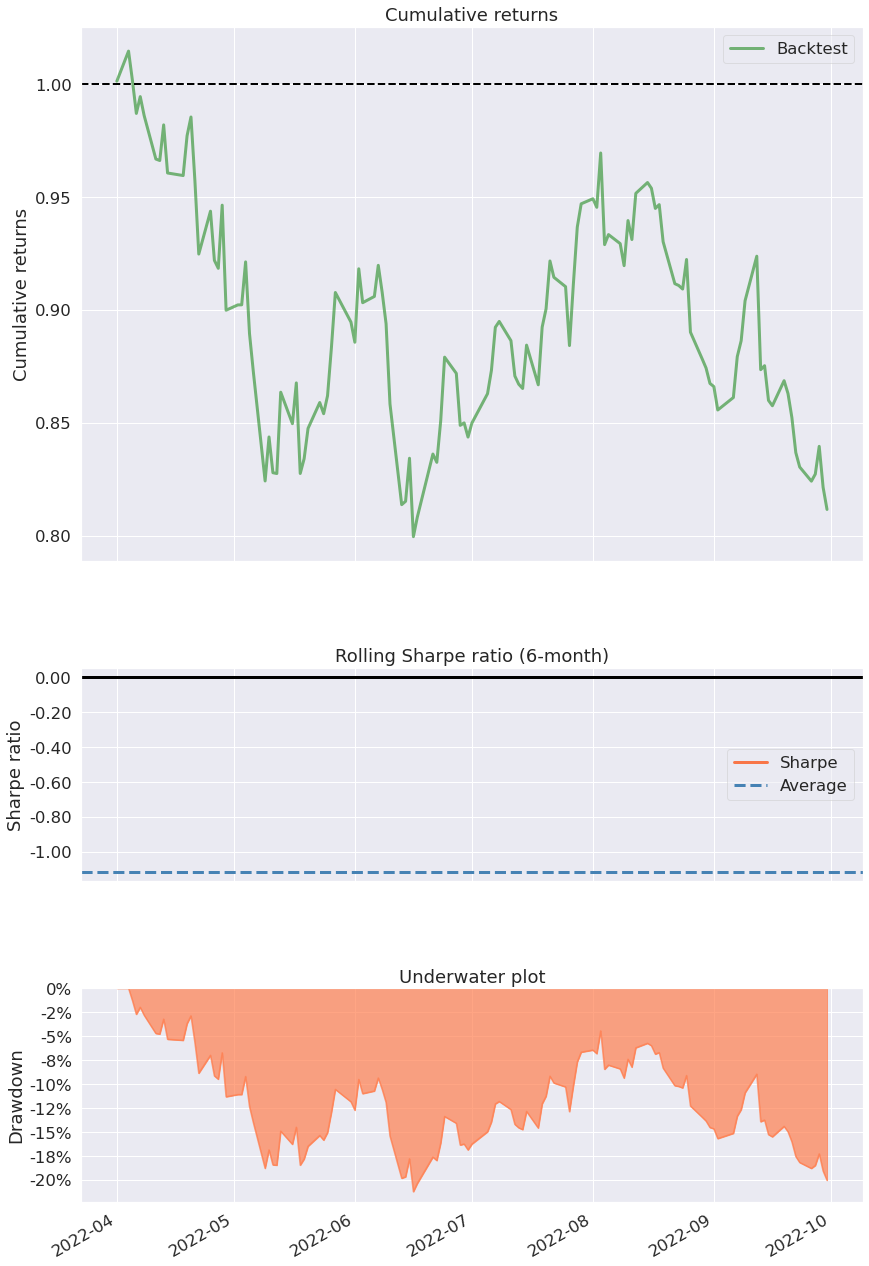

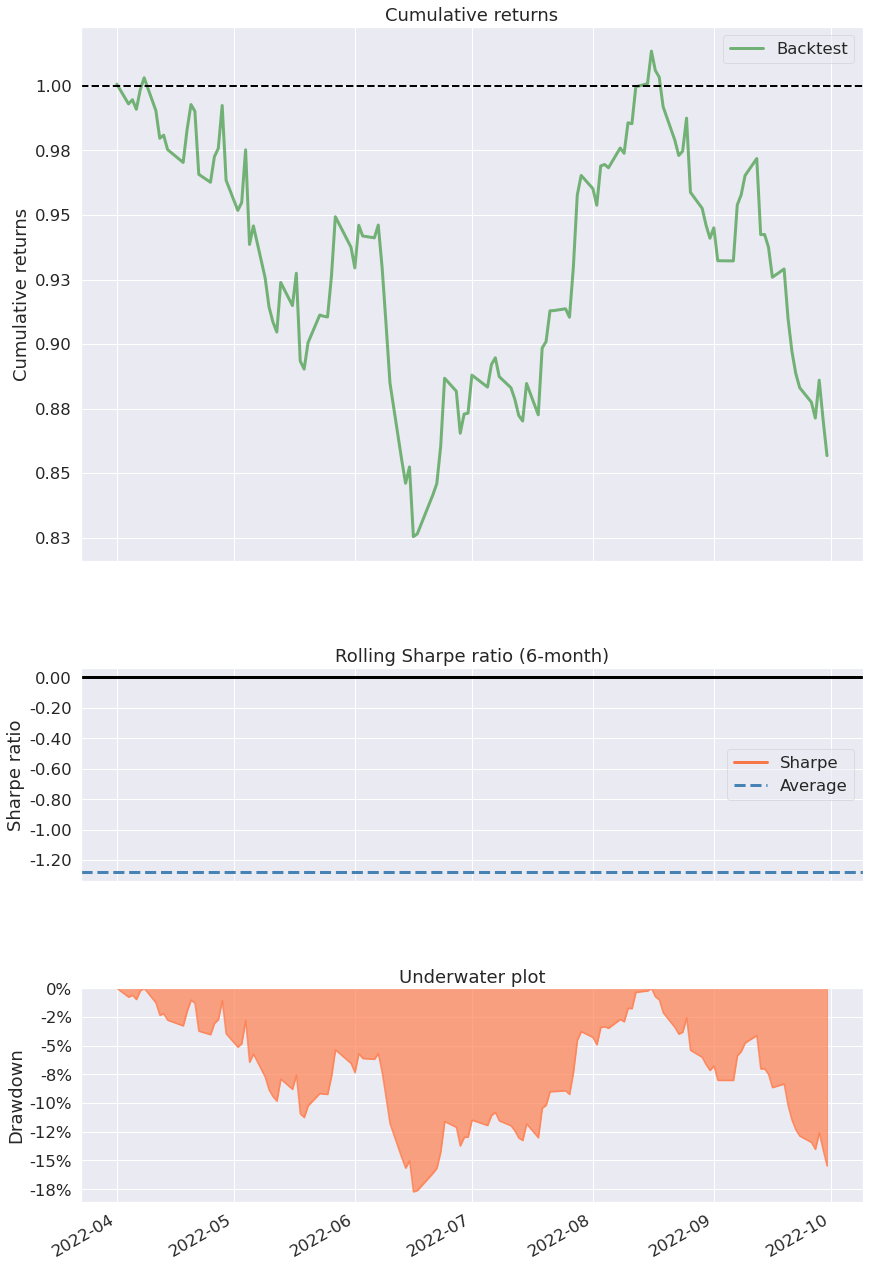

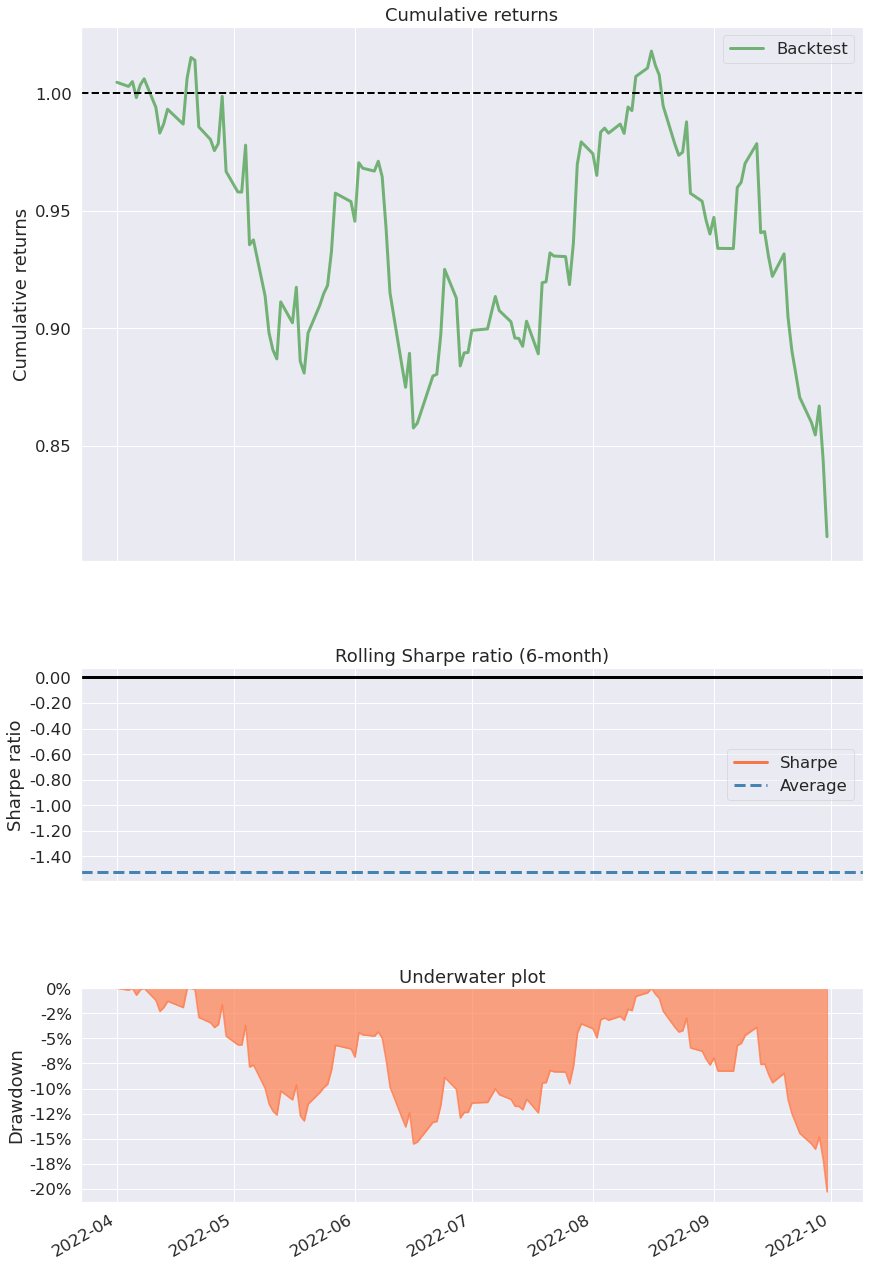

In [7]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio_returns1)
pf.create_simple_tear_sheet(portfolio_returns2)
pf.create_simple_tear_sheet(portfolio_returns3)